# <font color="blue"> DNP 1: Solid Effect </font>

In [1]:
import sys
sys.path.append('/Users/albertsmith/Documents/GitHub/')
sys.path.append('/Users/albertsmith/Documents/GitHub.nosync/')
import SLEEPY as sl
import numpy as np
import matplotlib.pyplot as plt

In [57]:
ex=sl.ExpSys(v0H=600,Nucs=['e','1H'],LF=[False,False],vr=1,T_K=80,pwdavg=sl.PowderAvg(q=2))
# ex.set_inter('hyperfine',i0=0,i1=1,Axx=-1000000,Ayy=-1000000,Azz=2000000)
ex.set_inter('dipole',i0=0,i1=1,delta=2000000)
# ex.set_inter('g',i=0,gxx=2.002,gyy=2.004,gzz=2.008,euler=[0,np.pi/4,0])

In [58]:
L=ex.Liouvillian()

In [59]:
L.clear_relax()
L.add_relax(Type='T2',i=0,T2=.890e-6)
L.add_relax(Type='T2',i=1,T2=5e-3)
L.add_relax(Type='T1',i=0,T1=1.4e-3)
L.add_relax(Type='T1',i=1,T1=20)
_=L.add_relax(Type='recovery')

In [60]:
seq=L.Sequence()
seq.add_channel(channel='e-',v1=3e6,voff=600e6)

In [61]:
U=seq.U(Dt=1e-5)**10

/Users/albertsmith/Documents/GitHub.nosync/SLEEPY/Propagator.py:210: UserWarning: Power of a propagator should only be used if the propagator length is an integer multiple of rotor periods
  warnings.warn('Power of a propagator should only be used if the propagator length is an integer multiple of rotor periods')


In [62]:
rho=sl.Rho(rho0='Thermal',detect=['ez','1Hz'])

In [63]:
rho.DetProp(U,n=2000)

/Users/albertsmith/Documents/GitHub.nosync/SLEEPY/Rho.py:555: UserWarning: The propagator length is not an integer multiple of the rotor period
  warnings.warn('The propagator length is not an integer multiple of the rotor period')


Density Matrix/Detection Operator
rho0: Thermal
detect[0]: ez
detect[1]: 1Hz
Current time is 200000.000 microseconds
2000 time points have been recorded


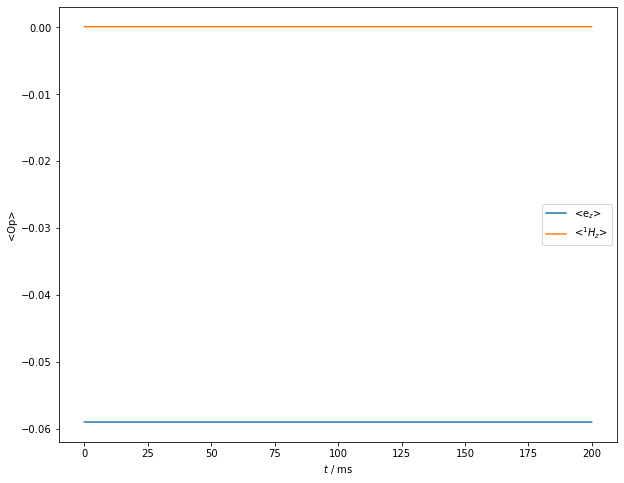

In [72]:
ax=rho.plot()
ax.figure.set_size_inches([10,8])

In [65]:
L.rf.add_field('e',v1=3e6,voff=600e6)

In [68]:
L[0].H[0].Hinter[0].A
#This should not be yielding a diagonal matrix, I think

array([ -2244.82425073   +888.78879569j, -20338.69846421-106619.1911503j ,
            0.             +0.j        , -20338.69846421+106619.1911503j ,
        -2244.82425073   -888.78879569j])

In [69]:
Hi=L.H[0].Hinter[0]

In [74]:
Hi.rotInter.Afull[10]

array([[ 203127.53221747-320077.77419239j,
         210293.09569023-331368.89550005j,
         133320.48042713-210079.46172304j,
          56347.86516404 -88790.02794603j,
          14583.90065532 -22980.55024762j],
       [-831454.34602244+457095.89481173j,
         157534.56655176 -86605.360843j  ,
         745461.57287125-409820.96771691j,
         587927.00631949-323215.60687391j,
         222787.52056006-122478.47587838j],
       [ 390535.98593929     +0.j        ,
        -552301.2879101      +0.j        ,
              0.             +0.j        ,
         552301.2879101      +0.j        ,
         390535.98593929     +0.j        ],
       [ 222787.52056006+122478.47587838j,
        -587927.00631949-323215.60687391j,
         745461.57287125+409820.96771691j,
        -157534.56655176 -86605.360843j  ,
        -831454.34602244-457095.89481173j],
       [  14583.90065532 +22980.55024762j,
         -56347.86516404 -88790.02794603j,
         133320.48042713+210079.46172304j,
       